## HFST
HFST is system in the family of languages and applications that include
also XFST, Foma, and SFST.  HFST can be used in a nice command line interface, which uses
Karttunen syntax for extended regular expressions.  In this mode it is similar to XFST and Foma.
HFST in python allows us to create machines
using Karttunen syntax, and manipulate them in Python.

FST languages are used to describe the lexicons, sound systems, and spelling systems of natural languages.  

I had better luck with the `hfst_dev` branch than with `hfst`.  See the installation notes below. Start with `jupyter lab lecture9_2023.ipynb`.

## Startup in my environment
```
cd /local/teach/cl23/L/L9
source /local/sys/python/cl23/bin/activate
jupyter lab hfst-howto.ipynb
```

In [1]:
import hfst_dev as hfst
import graphviz

In [2]:
r1 = hfst.regex('a:b')
r2 = hfst.regex('b:c')
r1.compose(r2)
print(r1)

0	1	a	c	0
1	0



In [12]:
import os
os.environ["PATH"] += os.pathsep + '/Users/erlich_jaso/opt/anaconda3/envs/CompLing/lib/python3.7/site-packages/graphviz/'

In [13]:
r1.view()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [3]:
x1 = hfst.regex('a b+')
x2 = hfst.regex('a+ b')
x1.intersect(x2)
print(x1)

0	1	a	a	0
1	2	b	b	0
2	0



In [4]:
type(x1)

libhfst_dev.HfstTransducer

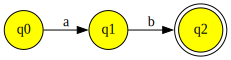

In [5]:
x1.view()

## Atomic symbols

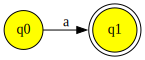

In [6]:
x1 = hfst.regex('a')
x1.view()

Semantically this is $\{a\}$.
### Multicharacter symbols

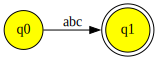

In [7]:
x1 = hfst.regex('abc')
x1.view()

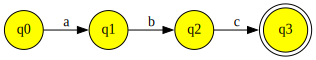

In [8]:
x1 = hfst.regex('a b c')
x1.view()

### Empty string

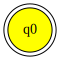

In [9]:
e1 = hfst.regex('0')
e1.view()

## Printing paths

In [14]:
x1 = hfst.regex('a b c')

In [15]:
set(x1.extract_paths(max_cycles=10).keys())

{'abc'}

In [192]:
x1.extract_paths(max_cycles=10)

{'abc': [('abc', 0.0)]}

In [193]:
x1.extract_paths(max_cycles=10).keys()

dict_keys(['abc'])

In [194]:
set(x1.extract_paths(max_cycles=10).keys())

{'abc'}

In [27]:
x2 = hfst.regex('[p | t | k][i | u | a]')
set(x2.extract_paths(max_cycles=2).keys())

{'ka', 'ki', 'ku', 'pa', 'pi', 'pu', 'ta', 'ti', 'tu'}

In [20]:
x3 = hfst.regex('[p | t | k][i | u | a]+')
set(x3.extract_paths(max_cycles=0
                     ).keys())

{'ka', 'ki', 'ku', 'pa', 'pi', 'pu', 'ta', 'ti', 'tu'}

In [21]:
import random

Random sample for larger set of paths

In [34]:
print(random.sample(set(x3.extract_paths(max_cycles=3).keys()),10))

['kuiuu', 'tuai', 'puuai', 'kauuu', 'kuaui', 'piui', 'tiaaa', 'taau', 'tuuia', 'kuiua']


In [22]:
def printrandom(m,n=10):
    print(random.sample(set(m.extract_paths(max_cycles=3).keys()),10))

In [24]:
printrandom(x3)

['tuiiu', 'tiiii', 'tuuua', 'kuuiu', 'kiuu', 'pii', 'kaauu', 'kiiai', 'piuu', 'puiai']


In [25]:
def printall(m):
    print(set(m.extract_paths(max_cycles=3).keys()))

## Concatenation

In [70]:
Cons = hfst.regex('[p | t | k]')
Vow = hfst.regex('[i | u | a]')
Syl = Cons.copy()
Syl.concatenate(Vow)
Syl.concatenate(Cons)

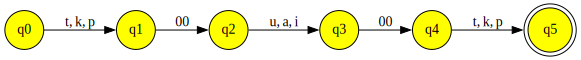

In [71]:
Syl.view()

In [72]:
Syl.minimize()

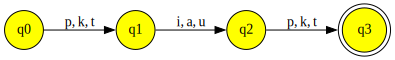

In [73]:
Syl.view()

In [74]:
printrandom(Syl)

['kup', 'kat', 'pik', 'kut', 'tuk', 'kik', 'tip', 'kuk', 'put', 'tup']


*In the command line interface, minimization happens automatically.*
In basic regular expressions, concatenation is a binary operation, but it is
written implicitly.

## Boolean operations

In [26]:
X = hfst.regex('a b+')
Y = hfst.regex('a+ b')

#### Union

In [27]:
Z = X.copy()
Z.disjunct(Y)
Z.minimize()
Z.view()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [28]:
set(Z.extract_paths(max_cycles=3).keys())

{'aaaaab', 'aaaab', 'aaab', 'aab', 'ab', 'abb', 'abbb', 'abbbb'}

*Union is an operation of basic regular expressions*
### Intersection

In [29]:
W = X.copy()
W.intersect(Y)
W.minimize()
W.view()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [203]:
set(W.extract_paths().keys())

{'ab'}

Intersection is an operation of the language of extended regular expressions, and not of basic language of regular expressions.

#### Set difference

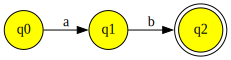

In [206]:
W2 = hfst.regex('[a b+] & [a+ b]')
W2.view()

In [207]:
A = hfst.regex('a+')
Aeven =  hfst.regex('[a a]+')

*Be sure to separate the a's.*

In [208]:
set(A.extract_paths(max_cycles=5).keys())

{'a', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa'}

In [130]:
set(Aeven.extract_paths(max_cycles=5).keys())

{'aa', 'aaaa', 'aaaaaa', 'aaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaaa'}

In [131]:
Aodd = A.copy()
Aodd.subtract(Aeven)
set(Aodd.extract_paths(max_cycles=5).keys())

{'a', 'aaa', 'aaaaa', 'aaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaaa'}

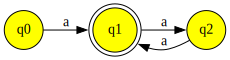

In [132]:
Aodd.view()

Set difference is not an operation in the basic language
of regular expressions.

## Kleene operations

In [136]:
A = hfst.regex('a b c')

#### Kleene plus

In [144]:
Aplus = A.copy()
Aplus.repeat_plus()
Aplus.minimize()
set(Aplus.extract_paths(max_cycles=5).keys())

{'abc',
 'abcabc',
 'abcabcabc',
 'abcabcabcabc',
 'abcabcabcabcabc',
 'abcabcabcabcabcabc'}

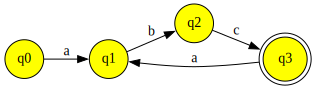

In [145]:
Aplus.view()

In [146]:
Astar = A.copy()
Astar.repeat_star()
Astar.minimize()
set(Astar.extract_paths(max_cycles=5).keys())

{'', 'abc', 'abcabc', 'abcabcabc', 'abcabcabcabc', 'abcabcabcabcabc'}

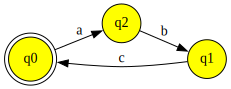

In [147]:
Astar.view()

### Universal set of strings

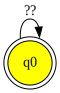

In [153]:
Any = hfst.regex('?')
U = Any.copy()
U.repeat_star()
U.minimize()
U.view()

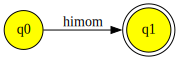

In [209]:
himom = hfst.regex('himom')
himom.view()

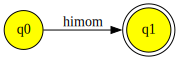

In [210]:
RES = U.copy()
RES.intersect(himom)
RES.view()

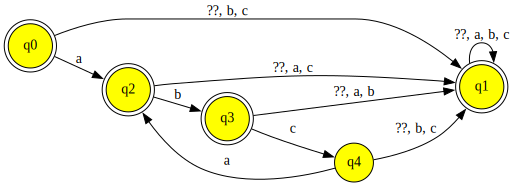

In [154]:
V = U.copy()
V.minus(Aplus)
V.view()

## Regular relations
Ordinary regular expressions (basic or extended) describe sets of strings.
Extended regular expressions can also describe *relations* between strings. This is useful for phonology, where an underlying form is mapped to a surface form.

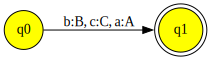

In [159]:
cap0 = hfst.regex("a:A | b:B | c:C")
cap0.view()

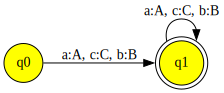

In [162]:
cap = cap0.copy()
cap.repeat_plus()
cap.minimize()
cap.view()

In [163]:
X1 = hfst.regex("c c b")

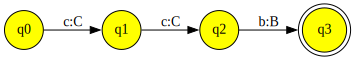

In [164]:
R1 = X1.copy()
R1.compose(cap)
R1.view()

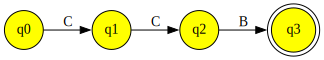

In [166]:
Y1 = R1.copy()
Y1.output_project()
Y1.view()

In [167]:
set(Y1.extract_paths())

{'CCB'}

### Cartesian product

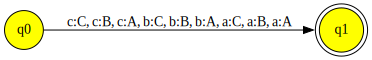

In [171]:
Xl = hfst.regex("a | b | c")
Xr = hfst.regex("A | B | C")
R = Xl.copy()
R.cross_product(Xr)
R.view()

In [177]:
R.repeat_star()
R.view()
R.minimize()

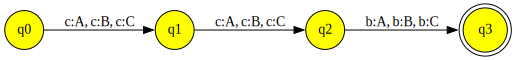

In [182]:
X1 = hfst.regex("c c b")
Y1 = X1.copy()
Y1.compose(R)
Y1.view()

In [183]:
Y1.output_project()

In [185]:
set(Y1.extract_paths().keys())

{'AAA',
 'AAB',
 'AAC',
 'ABA',
 'ABB',
 'ABC',
 'ACA',
 'ACB',
 'ACC',
 'BAA',
 'BAB',
 'BAC',
 'BBA',
 'BBB',
 'BBC',
 'BCA',
 'BCB',
 'BCC',
 'CAA',
 'CAB',
 'CAC',
 'CBA',
 'CBB',
 'CBC',
 'CCA',
 'CCB',
 'CCC'}

The input *ccb* was mapped to a non-singleton set of outputs, not a singleton set of one output.

# Setup
### Starting a notebook
```
virtualenv vhfst
source vhfst/bin/activate
jupyter hfst-howto.ipynb
```

### Modules

```
import pip
pip.main(['install','--upgrade','hfst-dev'])
pip.main(['install','--upgrade','graphviz'])
```

### Python version
I tried various versions of Python and of hfst.  On OSX and Ubuntu, I had success with python38 and hfst-dev.
Here is the setup on OSX.

```
sudo port install python38
sudo port select --set python python38
sudo port select --set python3 python38
sudo port install py38-virtualenv
sudo port select --set virtualenv virtualenv38
```

This was needed to make pip work.
```
python -m ensurepip --upgrade
```

In [4]:
import pip
pip.main(['install','--upgrade','hfst-dev'])
pip.main(['install','--upgrade','graphviz'])

/Users/erlich_jaso/opt/anaconda3/envs/CompLing/lib/python3.7/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: hfst-dev in /Users/erlich_jaso/opt/anaconda3/envs/CompLing/lib/python3.7/site-packages (3.15.0.10b0)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: graphviz in /Users/erlich_jaso/opt/anaconda3/envs/CompLing/lib/python3.7/site-packages (0.20.1)

0

## Methods
This lists the methods of a Python HFST transducer.  Some of them are indicative of an OpenFst backend.

In [10]:
help(hfst.HfstTransducer)

Help on class HfstTransducer in module libhfst_dev:

class HfstTransducer(builtins.object)
 |  HfstTransducer(*args)
 |  
 |  A synchronous finite-state transducer.
 |  
 |  Methods defined here:
 |  
 |  __del__ lambda self
 |  
 |  __getattr__ lambda self, name
 |  
 |  __init__(self, *args)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__ = _swig_repr(self)
 |  
 |  __setattr__ lambda self, name, value
 |  
 |  __str__(self)
 |      An AT&T representation of the transducer.
 |      
 |      Defined for print command. An example:
 |      
 |           >>> print(hfst.regex('[foo:bar::2]+'))
 |           0       1       foo     bar     2.000000
 |           1       1       foo     bar     2.000000
 |           1       0.000000 Todo
 |      Works only for small transducers.
 |  
 |  compare(self, arg2, harmonize=True)
 |      Whether this transducer and *another* are equivalent.
 |      
 |      Parameters
 |      ----------
 |      * `another` :
